In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cma

# this is just defining the function you want to minimize

<AxesSubplot:>

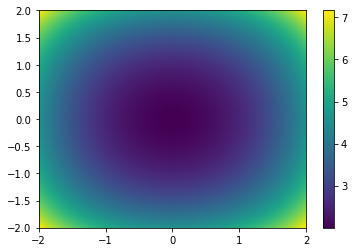

In [2]:
def func_map(cen_x=0,cen_y=0):
    return lambda x,y : np.cos((x-cen_x))+np.cos((y-cen_y))+(x-cen_x)**2+(y-cen_y)**2

def plot_background(X,Y,values):
    fig,ax=plt.subplots()
    im=ax.pcolormesh(X,Y,values,shading='auto')
    plt.colorbar(im)
    return ax

center_func=func_map(-0,0)

xs=np.linspace(-2,2,1000)

X,Y=np.meshgrid(xs,xs)
values=center_func(X,Y)

plot_background(X,Y,values)


# this runs an entire optimization, in the end you want something a little more complicated than this, but it shows how simple it is.

In [3]:
es = cma.CMAEvolutionStrategy(np.random.uniform(xs[0],xs[-1],2),0.1)
while not es.stop():
    proposed_solutions=es.ask() #returns a list of possible solutions
    evaluated_solutions=[center_func(*proposed_solutions[i]) for i in range(len(proposed_solutions))] #evaluate all those possible solutions by your function
    es.tell(proposed_solutions,evaluated_solutions) #tell the evultionary strategy what you measured
    es.logger.add() #adds things to logging
    es.disp()
es.result_pretty()

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=1023172, Tue Apr 26 11:15:13 2022)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 3.712748388782825e+00 1.0e+00 8.62e-02  8e-02  8e-02 0:00.0
    2     12 3.676499608461550e+00 1.1e+00 7.20e-02  6e-02  6e-02 0:00.0
    3     18 3.580537673854653e+00 1.3e+00 8.32e-02  7e-02  8e-02 0:00.0
   74    444 2.000000000000001e+00 1.1e+00 4.16e-05  7e-08  7e-08 0:00.0
termination on tolfun=1e-11
final/bestever f-value = 2.000000e+00 2.000000e+00
incumbent solution: [4.5207297144669764e-09, 2.4507552828157923e-09]
std deviation: [6.902909673505286e-08, 7.403792919046679e-08]


CMAEvolutionStrategyResult(xbest=array([-1.13174007e-09,  4.39483832e-08]), fbest=2.000000000000001, evals_best=443, evaluations=444, iterations=74, xfavorite=array([4.52072971e-09, 2.45075528e-09]), stds=array([6.90290967e-08, 7.40379292e-08]), stop={'tolfun': 1e-11})

# here i have made an ilustrative example of how it moves during a search, the class will do single iterations at a time and can plot the suggested solutions

In [4]:
class Slow_cma():
    def __init__(self,):
        opts=cma.CMAOptions(**{'verb_filenameprefix':'hhh'})
        self.es = cma.CMAEvolutionStrategy(np.random.uniform(xs[0],xs[-1],2),0.1,opts)
        self.iter_nr=0

    def one_iteration(self,):
        if not self.es.stop():
            proposed_solutions=self.es.ask()
            evaluated_solutions=[center_func(*proposed_solutions[i]) for i in range(len(proposed_solutions))]
            self.es.tell(proposed_solutions,evaluated_solutions)
            self.es.logger.add()
            self.es.disp()
            self.iter_nr+=1
            return np.array(proposed_solutions)
        else:
            self.es.result_pretty()
        

    def plot_iteration(self,proposed_solutions,ax=None):
        ax.scatter(proposed_solutions[:,0],proposed_solutions[:,1],c='r')
        ax.set_title(f'iteration : {self.iter_nr}')
        return ax



# here running 10 iterations at a time and plottting the points

In [5]:
hhh = Slow_cma()

(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=1026627, Tue Apr 26 11:15:13 2022)


Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 3.666887495813615e+00 1.0e+00 7.96e-02  7e-02  8e-02 0:00.0
    2     12 3.396999255103528e+00 1.2e+00 1.11e-01  1e-01  1e-01 0:00.0
    3     18 3.081955712567359e+00 1.3e+00 1.62e-01  1e-01  2e-01 0:00.0


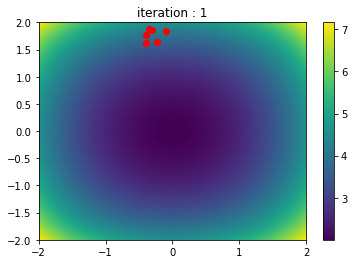

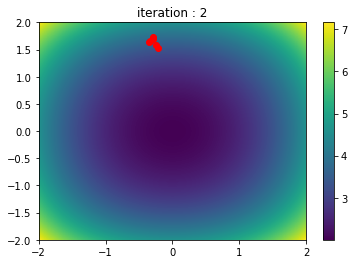

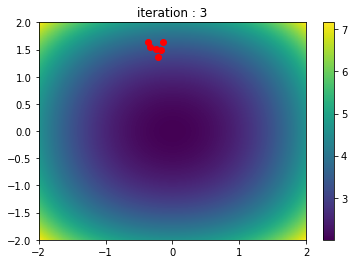

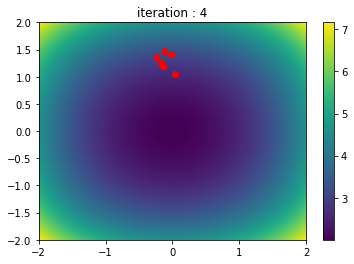

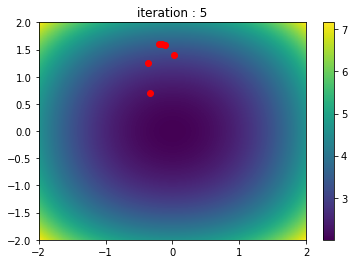

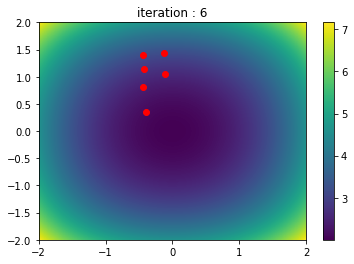

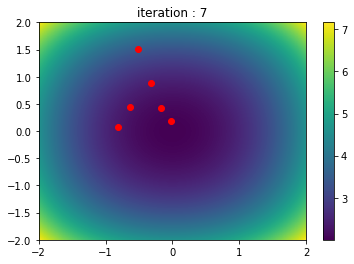

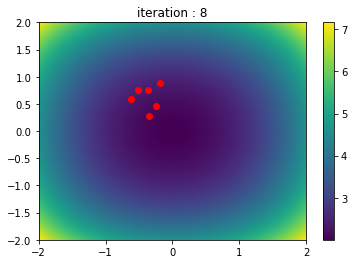

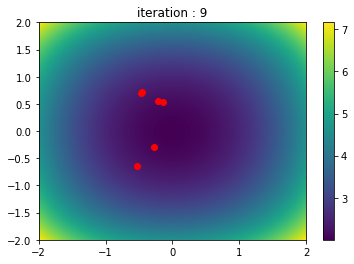

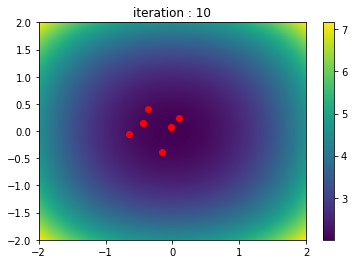

In [6]:
for i in range(10):
    new_background=plot_background(X,Y,values)
    proposed_solutions=hhh.one_iteration()
    ax=hhh.plot_iteration(proposed_solutions,new_background)
    

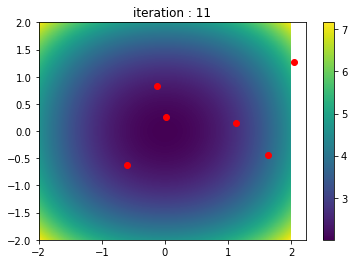

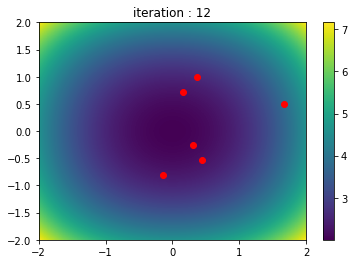

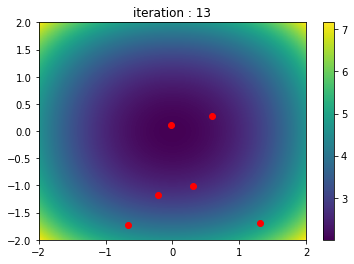

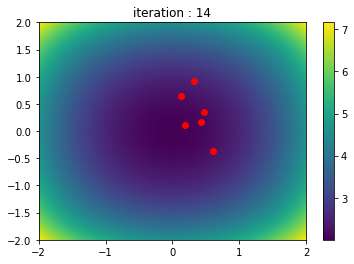

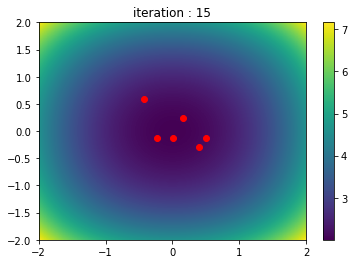

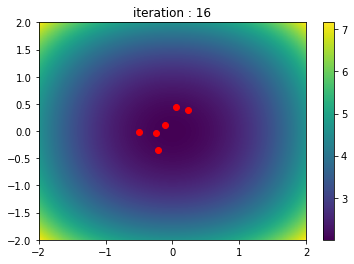

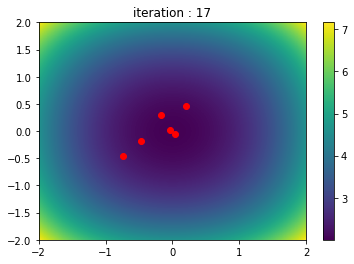

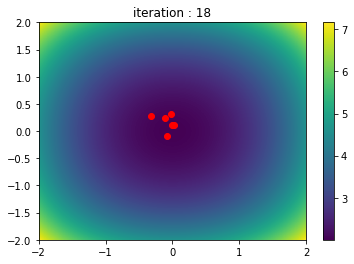

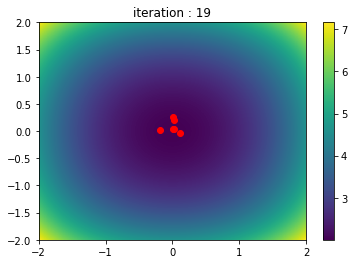

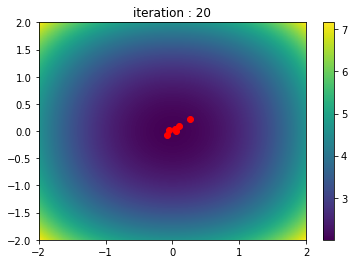

In [7]:
for i in range(10):
    new_background=plot_background(X,Y,values)
    proposed_solutions=hhh.one_iteration()
    ax=hhh.plot_iteration(proposed_solutions,new_background)
    

In [3]:
def new_func(solution):
    val=center_func(solution[0],solution[1])
    return {'val':val}

In [4]:
from kwantrl.optimization.cma import CmaRunner
from kwantrl.datahandling.datahandling import datahandler
dat=datahandler(data_path='C:/Users/torbj/Desktop/project/kwantrl_data')
runner=CmaRunner(new_func,np.random.uniform(xs[0],xs[-1],2),sigma0=0.5,datahandler=dat)

data saved to:C:/Users/torbj/Desktop/project/kwantrl_data/outcmaes/19/
(3_w,6)-aCMA-ES (mu_w=2.0,w_1=63%) in dimension 2 (seed=1071591, Tue Apr 26 11:21:41 2022)


In [5]:
runner.optimize()

Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1      6 4.522979330628454e+00 1.0e+00 4.90e-01  4e-01  5e-01 0:00.0
    2     12 2.643924450010099e+00 1.1e+00 9.16e-01  9e-01  1e+00 0:00.0
    3     18 2.751845918222104e+00 1.1e+00 1.19e+00  1e+00  1e+00 0:00.0
   66    396 2.000000000000004e+00 1.8e+00 4.42e-05  7e-08  1e-07 0:00.0
termination on tolfun=1e-11
final/bestever f-value = 2.000000e+00 2.000000e+00
incumbent solution: [-5.702526539858953e-10, -1.1788552240939704e-07]
std deviation: [6.908754161092874e-08, 1.3453374833045131e-07]
